In [7]:
# %matplotlib inline
from matplotlib import rc
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [8]:
## this line usually comes with a health warning, but supresses an annoying deprecation 
## warning whose solution doesn't add up. See release notes to numpy 1.15 regarding sums of generators
np.warnings.filterwarnings('ignore')  

Intro text

In [213]:
### Game of Life implementation from
## https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/



def life_step(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))


In [10]:
### Animating the Game of Life (from jakevdp)


from matplotlib import animation

def life_animation(X, figsize=(5,5), frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
#     figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    return anim

In [11]:


np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
anim = life_animation(X, frames=40, mode='once')
plt.close()        ## No matter what I tried, unless I add this line in I get an extra phantom canvas appearing!

HTML(anim.to_jshtml())


In [252]:
np.random.seed(0)
X = np.zeros((60, 61), dtype=bool)
X[30, 10:52] = 1 
anim = life_animation(X, frames=500, mode='once')
plt.close()

HTML(anim.to_jshtml())

How about we try some more interesting patterns, care of the amazing [conwaylife.com](http://conwaylife.com/wiki/Category:Patterns)

In [23]:
import requests
max_url = 'http://www.conwaylife.com/patterns/max.cells'
r = requests.get(max_url)

max_pattern = r.text.split('\r\n')[4:-1]
max_pattern

['..................O',
 '.................OOO',
 '............OOO....OO',
 '...........O..OOO..O.OO',
 '..........O...O.O..O.O',
 '..........O....O.O.O.O.OO',
 '............O....O.O...OO',
 'OOOO.....O.O....O...O.OOO',
 'O...OO.O.OOO.OO.........OO',
 'O.....OO.....O',
 '.O..OO.O..O..O.OO',
 '.......O.O.O.O.O.O.....OOOO',
 '.O..OO.O..O..O..OO.O.OO...O',
 'O.....OO...O.O.O...OO.....O',
 'O...OO.O.OO..O..O..O.OO..O',
 'OOOO.....O.O.O.O.O.O',
 '..........OO.O..O..O.OO..O',
 '.............O.....OO.....O',
 '.OO.........OO.OOO.O.OO...O',
 '..OOO.O...O....O.O.....OOOO',
 '..OO...O.O....O',
 '..OO.O.O.O.O....O',
 '.....O.O..O.O...O',
 '....OO.O..OOO..O',
 '......OO....OOO',
 '.......OOO',
 '........O']

In [26]:
def text_to_life(text_pattern):
    pattern = []
    max_width = 0
    
    for line in text_pattern:
        row = []
        
        for position in line:
            if position == '.':
                row.append(False)
            else:
                row.append(True)
        
        # Establish the maximum width of the array
        
        if len(row) > max_width:
            max_width = len(row)
            
        pattern.append(row)
        
        # Pad out any shorter rows back to the max length
        
    for row in pattern:
        if len(row) < max_width:
            pad_length = max_width - len(row)
            row += [0] * (pad_length)
    pattern = np.array(pattern)
    
    return pattern


In [27]:
max_pattern_array = text_to_life(max_pattern)

In [28]:
np.random.seed(0)
X = np.zeros((50, 50), dtype=bool)
X[10:37, 10:37] = max_pattern_array

anim = life_animation(X, frames=200, mode='once')
plt.close()

HTML(anim.to_jshtml())

### Time to try it on images

In [29]:
expanded = np.zeros((100,100))
data = np.random.random((10,10))
data = data * 2 - 1
index = 0

for x_square in range(10):
    for y_square in range(10):
        ## fill square in expanded
        local_y = 10 * y_square
        local_x = 10 * x_square

        for x in range(local_x, local_x + 10):
            for y in range(local_y, local_y + 10):
                expanded[x, y] = data[x_square, y_square]

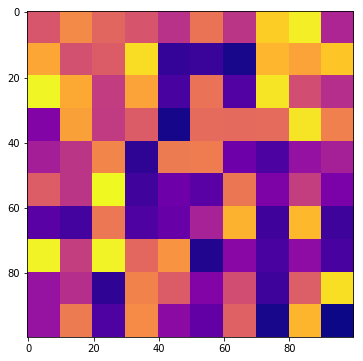

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(expanded, cmap='plasma')

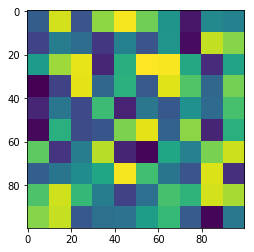

In [100]:
expanded = np.zeros((100,100))
data = np.random.random((10,10))


for x_square in range(10):
    for y_square in range(10):
        ## fill square in expanded
        local_y = 10 * y_square
        local_x = 10 * x_square

        for x in range(local_x, local_x + 10):
            for y in range(local_y, local_y + 10):
                expanded[x, y] = data[x_square, y_square]
plt.imshow(expanded)

In [104]:
size = (10,10)
np.random.random([s * 10 for s in size])

array([[0.86711454, 0.29426616, 0.43535347, ..., 0.98537856, 0.88728315,
        0.76506995],
       [0.31359061, 0.36553903, 0.20126677, ..., 0.11224999, 0.04236405,
        0.22774099],
       [0.44679332, 0.83699037, 0.22182403, ..., 0.71371776, 0.91540765,
        0.14658374],
       ...,
       [0.19296425, 0.28363721, 0.34992453, ..., 0.74254663, 0.05848812,
        0.02318131],
       [0.75361727, 0.12952377, 0.81188567, ..., 0.55328583, 0.45174872,
        0.0638156 ],
       [0.51760344, 0.11500033, 0.99182475, ..., 0.73844258, 0.88326674,
        0.96323816]])

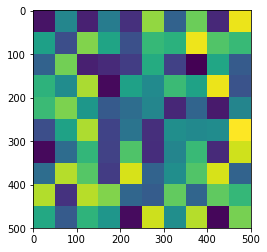

In [140]:
def colour_grid(size, density):
    '''
    docstring
    '''
    
    data = np.random.random(size)
    grid = np.zeros([s * density for s in size])
    
    # fill out each square in the grid with the same colour, but a finer density 
    # to enable the life cells to be more graduated
    
    for x_square in range(size[0]):
        for y_square in range(size[1]):
            local_x = density * x_square
            local_y = density * y_square
            
            for x in range(local_x, local_x + density):
                for y in range(local_y, local_y + density):
                    grid[x, y] = data[x_square, y_square]
    return grid

plt.imshow(colour_grid((10,10),50))
                    
    
    

In [214]:
size = (10,10)
density = 10

start_image = colour_grid(size, density)
# set which cells are alive at step 0
start_grid = start_image > 0.7
# set the behaviour for the life_effect 
wrap = size[0] * density
# set the number of frames you want
frames = 5000


def life_effect(image, step, wrap):
    '''
    docstring
    '''
    x_cells, y_cells = np.where(step)
    new_cells = np.mod(x_cells[0] -1, wrap)
    image[step] = image[new_cells, y_cells]
    return image


def data_gen():
    cnt = 0
    step = start_grid
    image = start_image
    while cnt < frames:
        cnt+=1
        if cnt > 1:
            step = life_step(step)
            image = life_effect(image, step, wrap)
        yield step, image

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
plt.tight_layout()

# intialize image objects (one in each axes)
img = ax1.imshow(start_image)
life = ax2.imshow(start_grid)


images = [img, life]

def run(data):
    # update the data
    step, image = data

    # update the images with the new data
    images[0].set_data(step)
    images[1].set_data(image)
    return images


ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=100,
    repeat=False)
plt.close()
HTML(ani.to_jshtml())



$Chaos + Life \to Magic$ 

This time, let's use the max_filler pattern kick things off, and change the life effect function. Instead of drawing the colour from one of our neighbours, we'll just flick the colour somehow. What better way than the old favourite $rx(1 - x)$, which displays chaotic behaviour when r is between 3 and 4. 

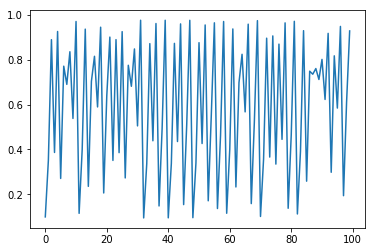

In [219]:
def life_effect(x, r):
    return r * x * (1 - x)

life_effect = np.vectorize(life_effect)

r = 3.9

sequence = [0.1]

for i in range(99):
    sequence.append(life_effect(sequence[-1], r))
    
plt.plot(np.arange(100), sequence)

In [226]:
np.shape(life_effect(start_image, r))

(100, 100)

In [251]:
size = (10,10)
density = 10

start_image = colour_grid(size, density)
# set which cells are alive at step 0
start_grid = np.zeros((size[0] * density, size[1] * density), dtype='bool')
start_grid[36:63, 36:63] = max_pattern_array
# set the 'chaos factor' for the life_step
r = 3.5

# set the behaviour for the life_effect 
wrap = size[0] * density
# set the number of frames you want
frames = 100000

def data_gen():
    cnt = 0
    step = start_grid
    image = start_image
    while cnt < frames:
        cnt+=1
        if cnt > 1:
            step = life_step(step)
            image[step] = life_effect(image[step], r)
        yield step, image

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
plt.tight_layout()

# intialize image objects (one in each axes)
img = ax1.imshow(start_image)
life = ax2.imshow(start_grid)


images = [img, life]

def run(data):
    # update the data
    step, image = data

    # update the images with the new data
    images[0].set_data(step)
    images[1].set_data(image)
    return images


ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=100,
    repeat=False)
plt.close()
HTML(ani.to_jshtml())



### possible transformation schemes
- transformation based on the change to the cell in that step - if it is born, it dies, it stays alive or it stays dead
- colour flipping
- rgb transforming (as below with tree)
- final version (as a class?) which loads an image, runs life, returns the final output or (on request) the animation

In [ ]:
# Install opencv.
# Best option for me was pip install opencv-python

import cv2
tree = cv2.imread("tree.jpg")
# print(tree)
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(tree, aspect='equal')



In [9]:
tree.shape

(640, 480, 3)

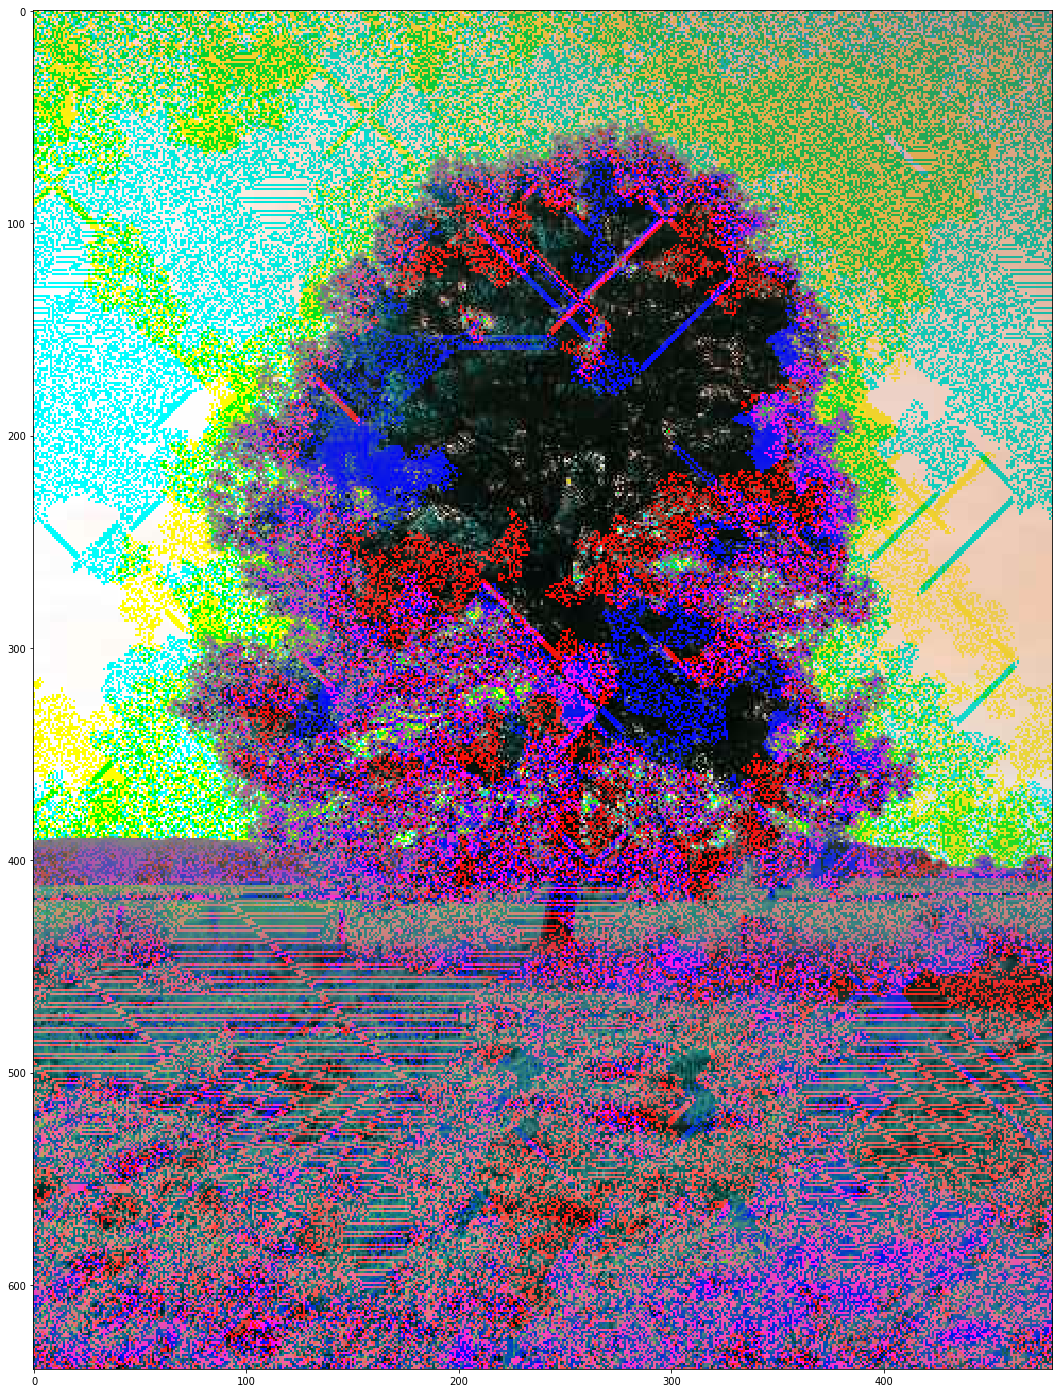

In [46]:
### A really basic go at using game of life to bend an image


tree2 = tree

tree2_red = tree2[:,:,0]

tree2_green = tree2[:,:,1]

tree2_blue = tree2[:,:,2]


tree_of_life_red = (tree[:,:,0]<130)

tree_of_life_blue = (tree[:,:,2]<130)

tree_of_life_green = (tree[:,:,1]<130)

fig, ax = plt.subplots(figsize = (25,25))

for i in range(30):
        
    plt.imshow(tree2)
    
    for i in range(10):
        tree_of_life_red = life_step(tree_of_life_red)

        tree2_red[tree_of_life_red] = 255 - tree[:,:,0][tree_of_life_red]

        tree_of_life_blue = life_step(tree_of_life_blue)

        tree2_blue[tree_of_life_blue] = 255 - tree[:,:,2][tree_of_life_blue]

        tree_of_life_green = life_step(tree_of_life_green)

        tree2_blue[tree_of_life_green] = 255 - tree[:,:,1][tree_of_life_green]
    
    
    

